# MegaSena ML Model

### Importando bibliotecas

In [1]:
import pandas as pd 
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt

### Trazendo o DataFrame

In [2]:
df = pd.read_parquet('Datasets\MegaSena.pq')
df.head()

,num_concurso,data_concurso,first,second,third,forth,fifth,sixth,status
0,2669,16/12/2023,04,07,16,35,46,54,Acumulou
1,2668,14/12/2023,01,27,30,41,46,57,Acumulou
2,2667,12/12/2023,01,04,08,21,46,51,Acumulou
3,2666,09/12/2023,05,25,29,30,43,47,ganhador
4,2665,07/12/2023,03,14,21,22,37,39,Acumulou


In [3]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2669 entries, 0 to 2668
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   num_concurso   2669 non-null   object
 1   data_concurso  2669 non-null   object
 2   first          2669 non-null   object
 3   second         2669 non-null   object
 4   third          2669 non-null   object
 5   forth          2669 non-null   object
 6   fifth          2669 non-null   object
 7   sixth          2669 non-null   object
 8   status         2669 non-null   object
dtypes: object(9)
memory usage: 187.8+ KB
None


### Tratamento das colunas do DataFrame

In [4]:
df['data_concurso'] = pd.to_datetime(df['data_concurso'], format="%d/%m/%Y")
df[df.columns[2:-1]] = df[df.columns[2:-1]].apply(pd.to_numeric, errors = "coerce")
df['status'] = df['status'].replace({'ganhador': 'Ganhou', 'ganhadores': 'Ganhou', 'prêmios': 'Ganhou'})
# df.set_index(df['data_concurso'], inplace = True)
# df.drop(columns = 'data_concurso')

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2669 entries, 0 to 2668
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   num_concurso   2669 non-null   object        
 1   data_concurso  2669 non-null   datetime64[ns]
 2   first          2669 non-null   int64         
 3   second         2669 non-null   int64         
 4   third          2669 non-null   int64         
 5   forth          2669 non-null   int64         
 6   fifth          2669 non-null   int64         
 7   sixth          2669 non-null   int64         
 8   status         2669 non-null   object        
dtypes: datetime64[ns](1), int64(6), object(2)
memory usage: 187.8+ KB


### EDA - Análise Exploratória dos Dados

In [6]:
df.describe()[1:]

,first,second,third,forth,fifth,sixth
mean,8.611090,17.341326,26.351817,35.065193,43.565380,52.172724
std,6.996902,9.144477,9.971711,9.763521,9.039349,7.006138
min,1.000000,2.000000,3.000000,8.000000,11.000000,22.000000
25%,3.000000,10.000000,19.000000,28.000000,38.000000,49.000000
50%,7.000000,16.000000,26.000000,35.000000,45.000000,54.000000
75%,12.000000,23.000000,33.000000,42.000000,51.000000,58.000000
max,50.000000,51.000000,56.000000,58.000000,59.000000,60.000000


In [7]:
print(f' Rows : {df.shape[0]} \n columns : {df.shape[1]}')

 Rows : 2669 
 columns : 9


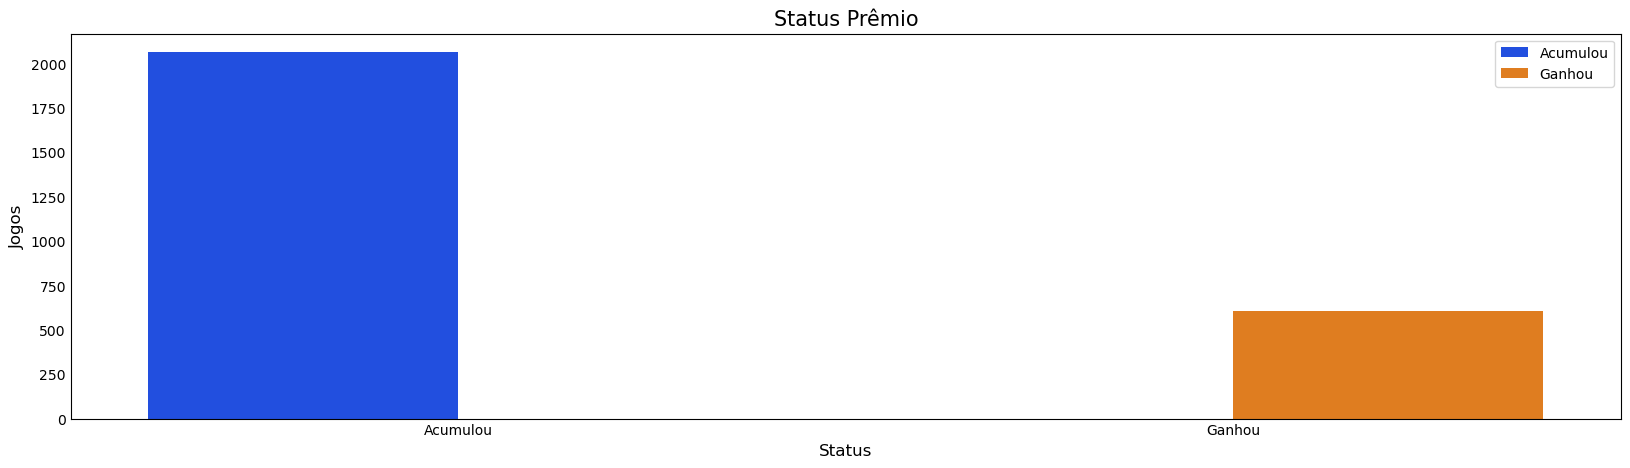

In [8]:
plt.figure(figsize=(20, 5))
ax = sns.countplot(x = 'status', data = df, hue = 'status', palette = 'bright')
plt.title('Status Prêmio', fontsize = 15)
plt.xlabel('Status', fontsize = 12)
plt.ylabel('Jogos', fontsize = 12)
ax.tick_params(axis='both', which='both', length=0)
ax.legend(loc='upper right')
plt.show()

#### Correlação

Text(0.5, 1.0, 'Correlação entre os números')

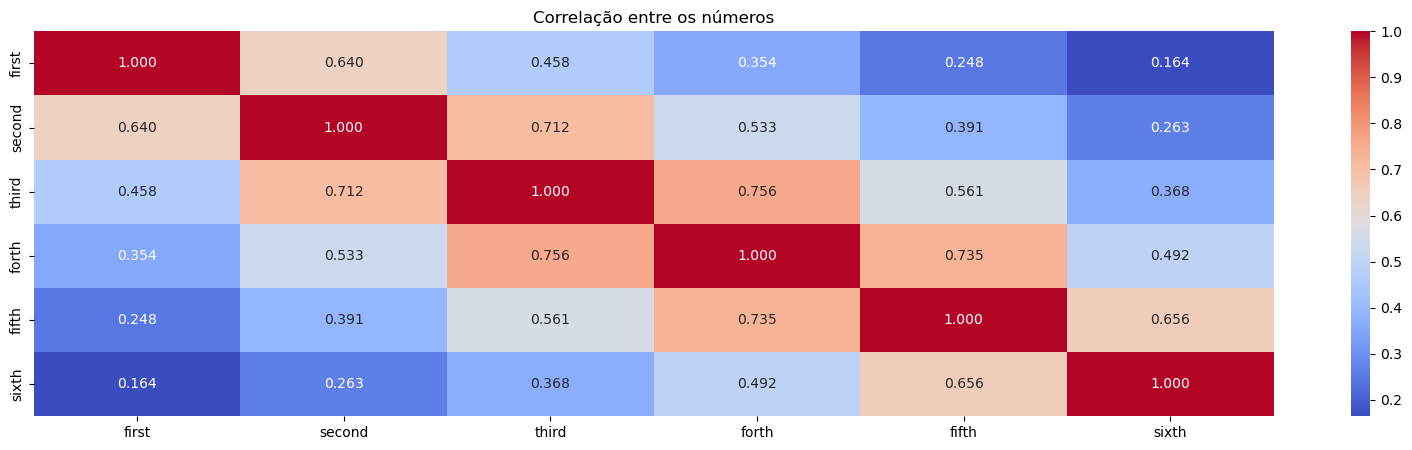

In [9]:
corr = df.corr()
plt.figure(figsize=(20, 5))
sns.heatmap(corr, annot= True, cmap='coolwarm', fmt= '.3f')
plt.title('Correlação entre os números')

#### Histogramas

##### Histogramas de todos os numeros que já sairam 

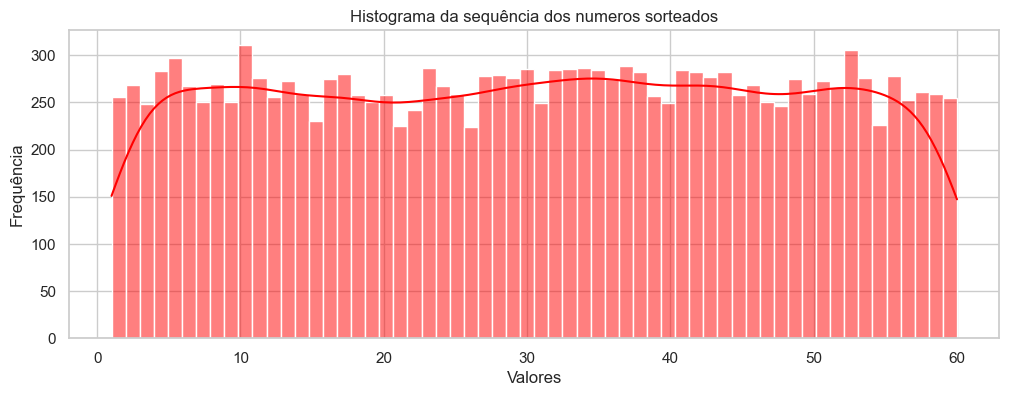

In [10]:
sns.set(style="whitegrid")
plt.figure(figsize=(12, 4))
sns.histplot(df[df.columns[2:-1]].values.flatten(), bins = 60, kde = True, color='red')
plt.title('Histograma da sequência dos numeros sorteados')
plt.xlabel('Valores')
plt.ylabel('Frequência')
plt.show()

##### Histogramas das sequencia de cada numero por ordem de sorteio

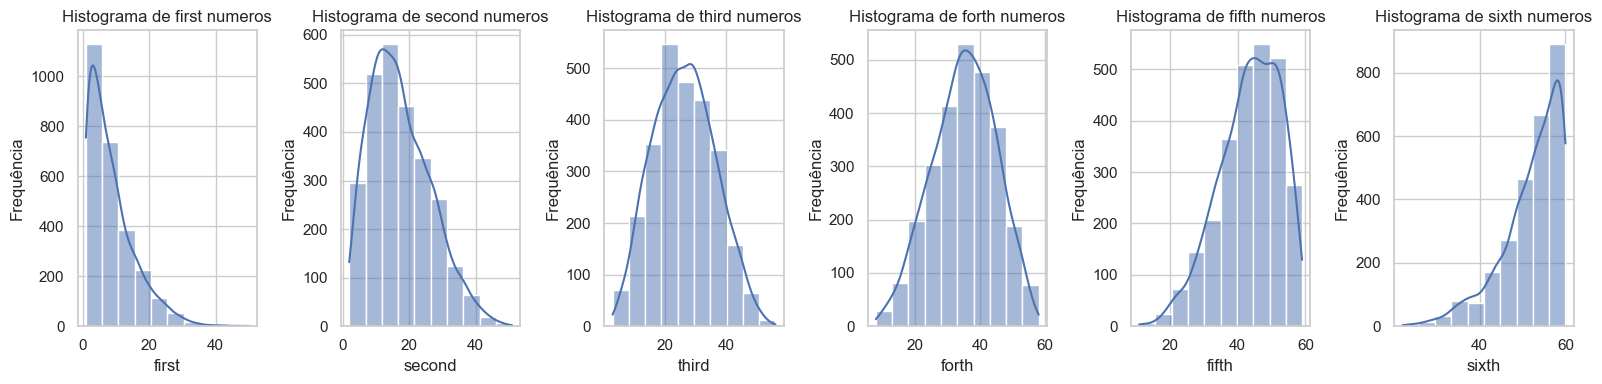

In [11]:
sns.set(style="whitegrid")
hist_columns = df.columns[2:-1]
ncols = len(hist_columns)
fig, axes = plt.subplots(nrows = 1, ncols= ncols, figsize = (16, 4))
for i, cols in enumerate(hist_columns):
    sns.histplot(data=df, x = cols, bins = 10, kde = True, ax = axes[i])
    axes[i].set_title(f'Histograma de {cols} numeros')
    axes[i].set_xlabel(cols)
    axes[i].set_ylabel('Frequência')
plt.tight_layout()

<Figure size 1200x400 with 0 Axes>

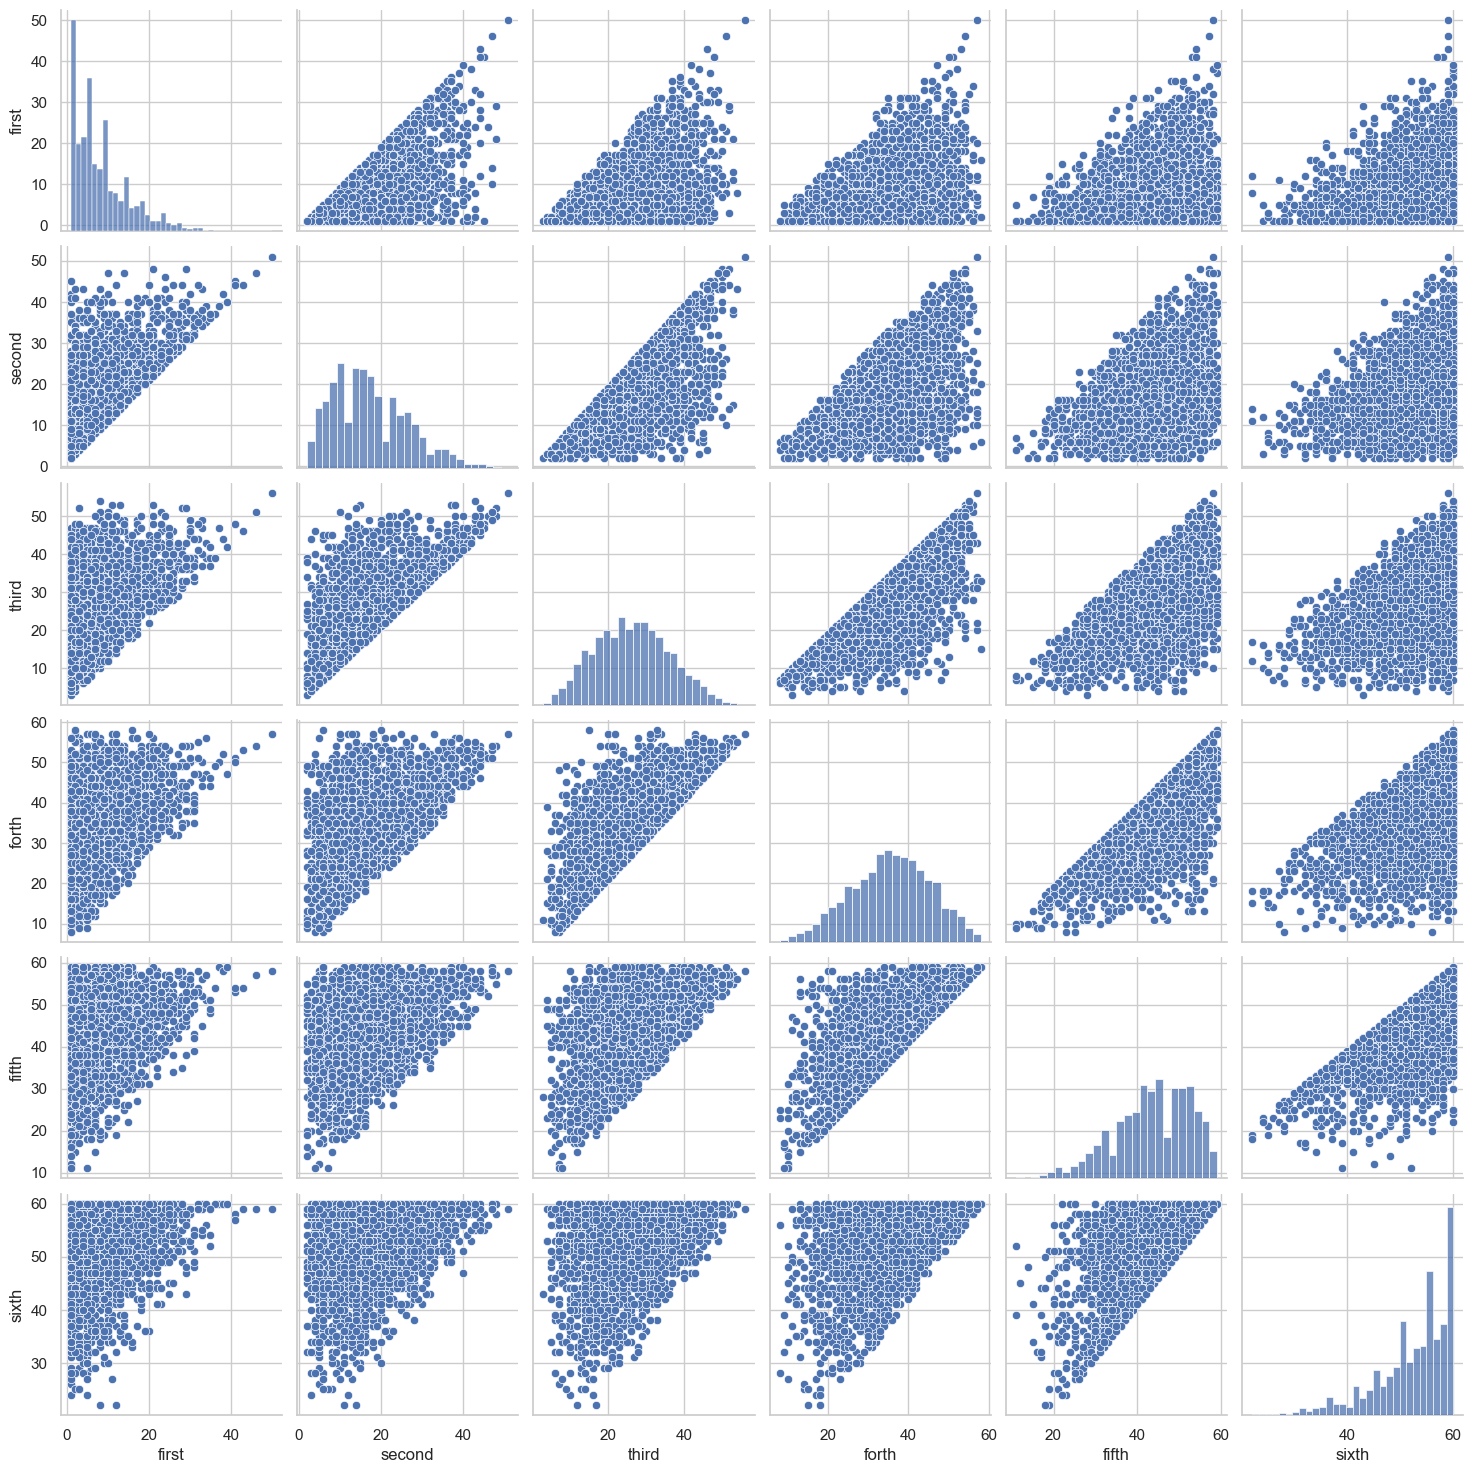

In [12]:
sns.set(style="whitegrid")
plt.figure(figsize=(12, 4))
sns.pairplot(data = df)
plt.show()

##### Histograma das sequencias de cada numero por status

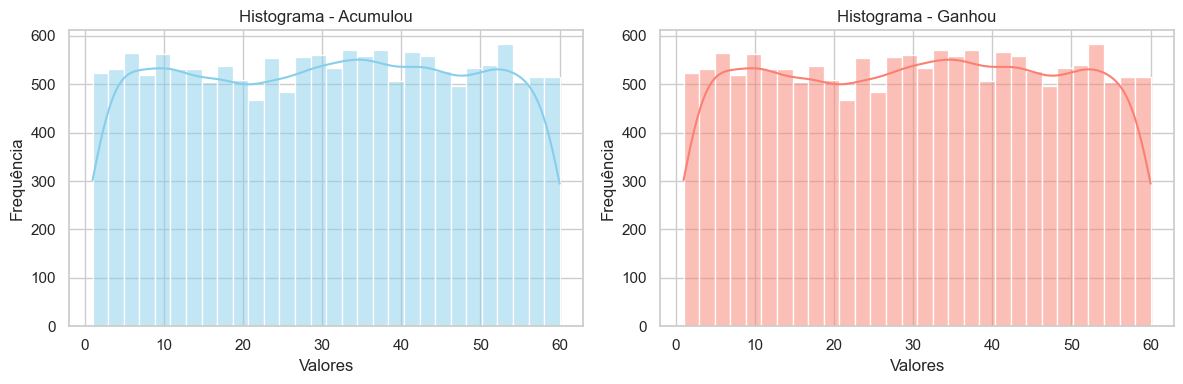

In [13]:
sns.set(style="whitegrid")
plt.figure(figsize=(12, 4))

df_acumulou = df[df['status'] == 'Acumulou']
df_ganhou = df[df['status'] == 'Ganhou']

plt.subplot(1, 2, 1)
sns.histplot(df[df_acumulou.columns[2:-1]].values.flatten(), bins=30, kde=True, color='skyblue')
plt.title('Histograma - Acumulou')
plt.xlabel('Valores')
plt.ylabel('Frequência')

plt.subplot(1, 2, 2)
sns.histplot(df[df_ganhou.columns[2:-1]].values.flatten(), bins=30, kde=True, color='salmon')
plt.title('Histograma - Ganhou')
plt.xlabel('Valores')
plt.ylabel('Frequência')

plt.tight_layout()

##### Correlação por Status 

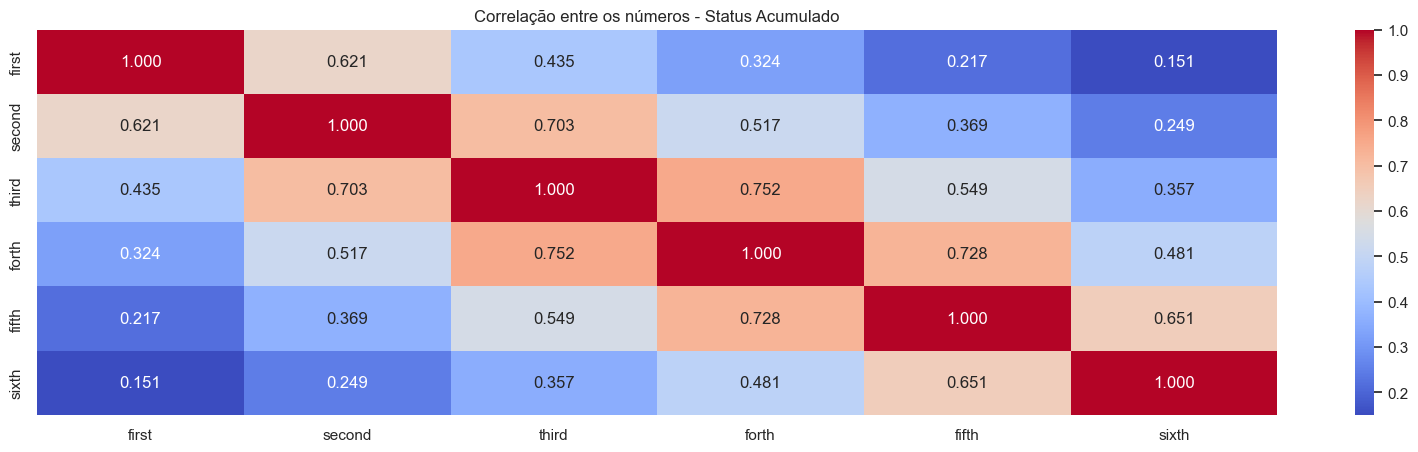

In [14]:
corr_acc = df[df['status'] == 'Acumulou'].corr()
plt.figure(figsize=(20, 5))
sns.heatmap(corr_acc, annot= True, cmap='coolwarm', fmt= '.3f')
plt.title('Correlação entre os números - Status Acumulado')
plt.show()

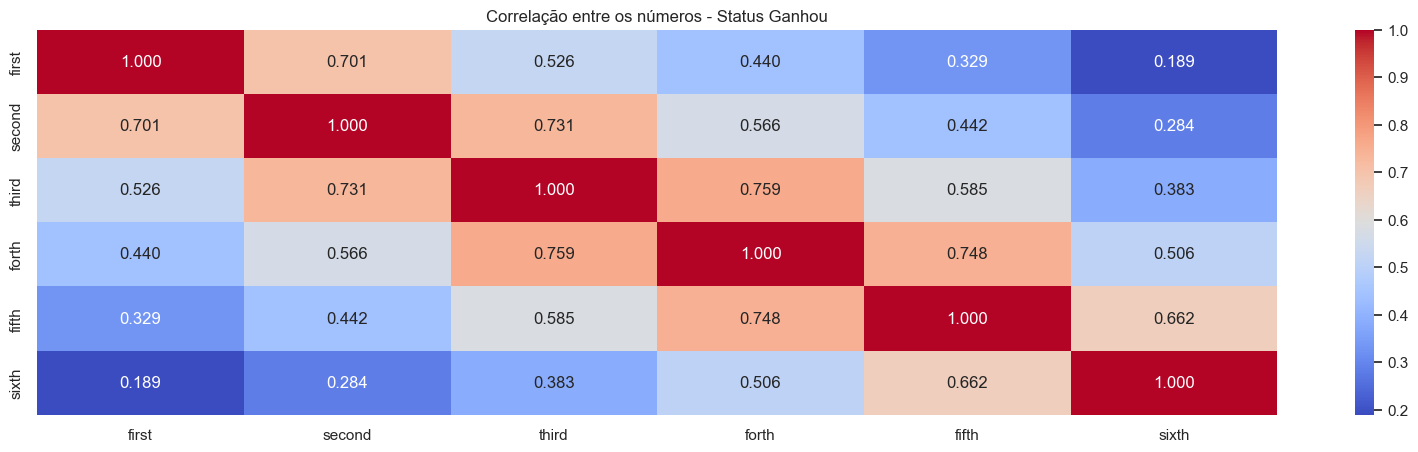

In [15]:
corr_win = df[df['status'] == 'Ganhou'].corr()
plt.figure(figsize=(20, 5))
sns.heatmap(corr_win, annot= True, cmap='coolwarm', fmt= '.3f')
plt.title('Correlação entre os números - Status Ganhou')
plt.show()

##### Histogramas das sequencia de cada numero por ordem de sorteio e por status

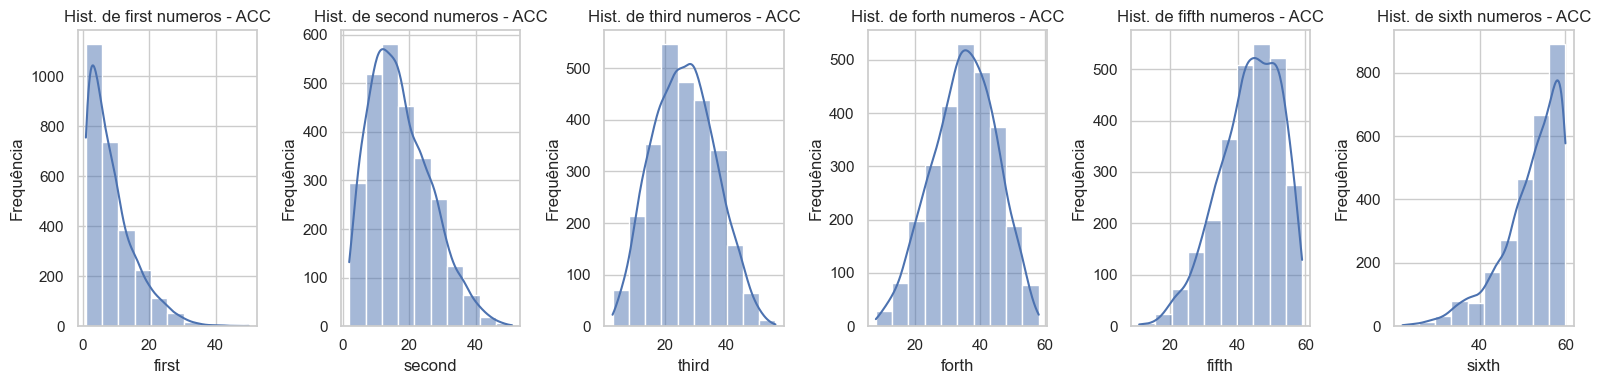

In [16]:
sns.set(style="whitegrid")
df_acc = df[df['status'] == 'Acumulou']
hist_columns_acc = df_acc.columns[2:-1]
ncols = len(hist_columns)
fig, axes = plt.subplots(nrows = 1, ncols= ncols, figsize = (16, 4))
for i, cols in enumerate(hist_columns):
    sns.histplot(data=df, x = cols, bins = 10, kde = True, ax = axes[i])
    axes[i].set_title(f'Hist. de {cols} numeros - ACC')
    axes[i].set_xlabel(cols)
    axes[i].set_ylabel('Frequência')
plt.tight_layout()

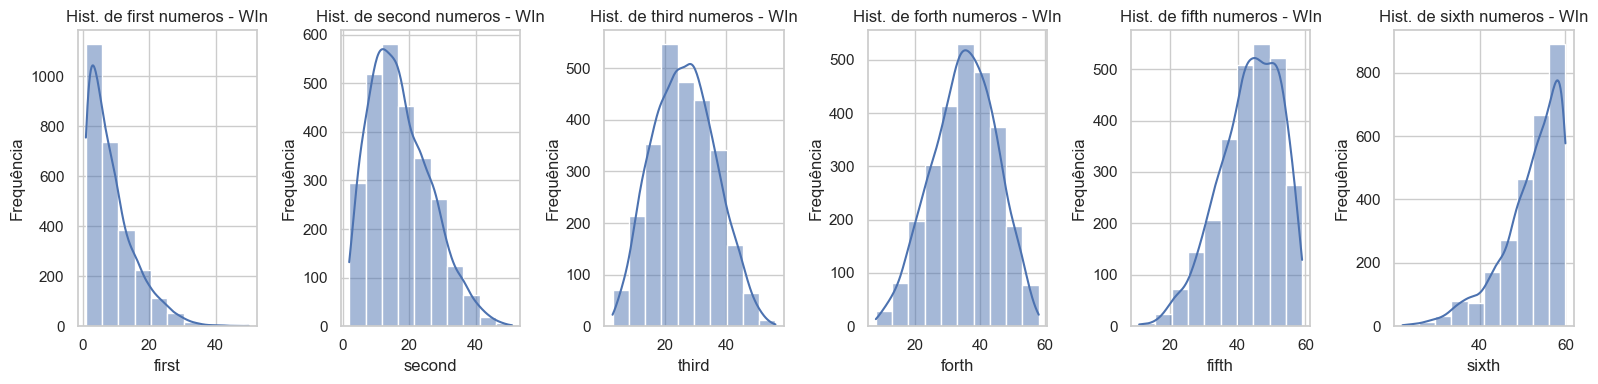

In [17]:
sns.set(style="whitegrid")
df_acc = df[df['status'] == 'Ganhou']
hist_columns_acc = df_acc.columns[2:-1]
ncols = len(hist_columns)
fig, axes = plt.subplots(nrows = 1, ncols= ncols, figsize = (16, 4))
for i, cols in enumerate(hist_columns):
    sns.histplot(data=df, x = cols, bins = 10, kde = True, ax = axes[i])
    axes[i].set_title(f'Hist. de {cols} numeros - WIn')
    axes[i].set_xlabel(cols)
    axes[i].set_ylabel('Frequência')
plt.tight_layout()

### Desenvolvendo o modelo de Machine Learning 

#### Importando bibliotecas de Machine Learning

In [18]:
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, classification_report, f1_score

#### Suprindo Dados com SMOTE para equivalência dos resultados

In [19]:
label_encoder = LabelEncoder()
df['status'] = label_encoder.fit_transform(df['status'])

X = df[df.columns[2:]].drop('status', axis = 1)
y = df['status']

smote = SMOTE(random_state=42)
X, y = smote.fit_resample(X, y)

df_new = pd.concat([X, y], axis = 1)
df_new.head()

,first,second,third,forth,fifth,sixth,status
0,4,7,16,35,46,54,0
1,1,27,30,41,46,57,0
2,1,4,8,21,46,51,0
3,5,25,29,30,43,47,1
4,3,14,21,22,37,39,0


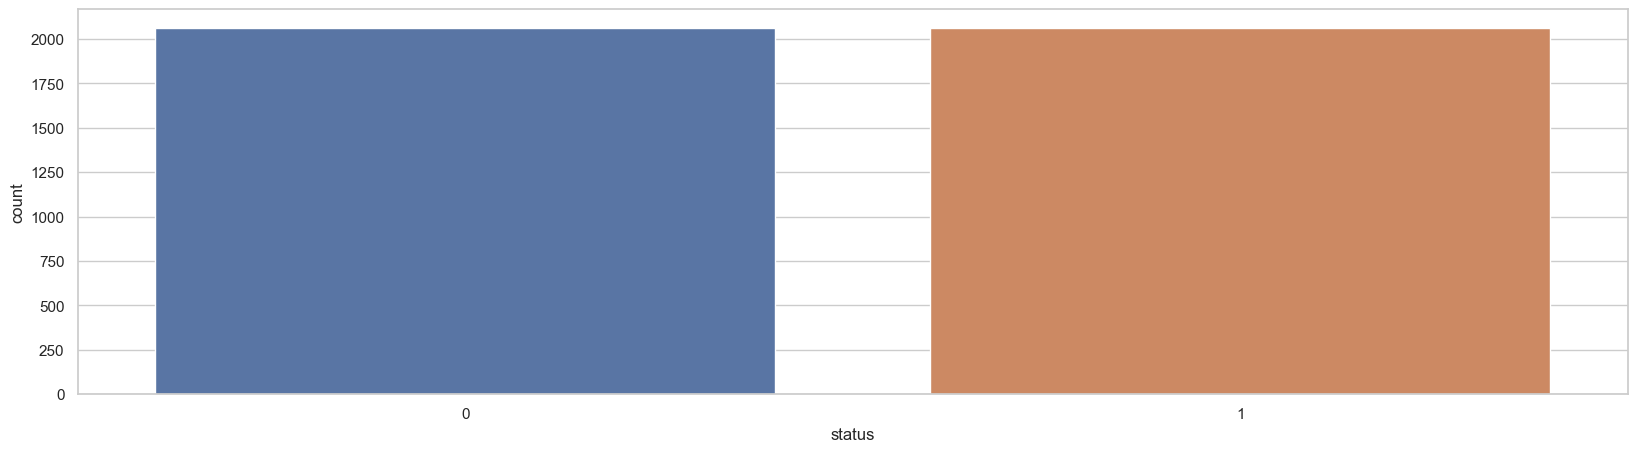

In [20]:
plt.figure(figsize=(20, 5))
ax2 = sns.countplot(x = 'status', data = df_new)
ax2
plt.show()

In [21]:
X = df_new[df.columns[2:-1]]
y = df_new['status']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state =42)

#### Regressão Logistica

In [22]:
logistic_regression = LogisticRegression(max_iter=1000)
logistic_regression.fit(X_train, y_train)
predict_logreg = logistic_regression.predict(X_test)

In [23]:
confusion_matrix(y_test, predict_logreg)

array([[247, 175],
       [154, 250]], dtype=int64)

In [24]:
print(classification_report(y_test, predict_logreg))

              precision    recall  f1-score   support

           0       0.62      0.59      0.60       422
           1       0.59      0.62      0.60       404

    accuracy                           0.60       826
   macro avg       0.60      0.60      0.60       826
weighted avg       0.60      0.60      0.60       826



#### Random Forest Classifier

In [25]:
random_forest = RandomForestClassifier(n_estimators=100, random_state=42)
random_forest.fit(X_train, y_train)
predict_randomForest = random_forest.predict(X_test)

In [26]:
confusion_matrix(y_test, predict_randomForest)

array([[328,  94],
       [ 67, 337]], dtype=int64)

In [27]:
print(classification_report(y_test, predict_randomForest))

              precision    recall  f1-score   support

           0       0.83      0.78      0.80       422
           1       0.78      0.83      0.81       404

    accuracy                           0.81       826
   macro avg       0.81      0.81      0.81       826
weighted avg       0.81      0.81      0.81       826



#### Decision Tree Classifier

In [28]:
decision_tree = DecisionTreeClassifier(criterion= 'entropy', random_state = 42)
decision_tree.fit(X_train, y_train)
predict_decision_tree = decision_tree.predict(X_test)

In [29]:
confusion_matrix(y_test, predict_decision_tree)

array([[296, 126],
       [100, 304]], dtype=int64)

In [30]:
print(classification_report(y_test, predict_decision_tree))

              precision    recall  f1-score   support

           0       0.75      0.70      0.72       422
           1       0.71      0.75      0.73       404

    accuracy                           0.73       826
   macro avg       0.73      0.73      0.73       826
weighted avg       0.73      0.73      0.73       826



#### Voting Classifier 

In [31]:
voting_classifier = VotingClassifier(
    estimators=[
        ('rf', random_forest), 
        ('rl', logistic_regression), 
        ('dtc', decision_tree)
    ], 
    voting = 'hard'
)
voting_classifier.fit(X_train, y_train)
predict_voting_classifier = voting_classifier.predict(X_test)

In [32]:
confusion_matrix(y_test, predict_voting_classifier)

array([[315, 107],
       [ 72, 332]], dtype=int64)

In [33]:
print(classification_report(y_test, predict_voting_classifier))

              precision    recall  f1-score   support

           0       0.81      0.75      0.78       422
           1       0.76      0.82      0.79       404

    accuracy                           0.78       826
   macro avg       0.79      0.78      0.78       826
weighted avg       0.79      0.78      0.78       826



### Resumo dos Modelos 

In [34]:
pd.DataFrame({
    'Modelo' : 
        [
            'Linear Regression', 
            'Random Forest Classifier', 
            'Decision Tree Classifier', 
            'Voting Classifier'
        ], 
        
    'Accuracy Score' : 
        [
            round(accuracy_score(y_test, predict_logreg) * 100, 2), 
            round(accuracy_score(y_test, predict_randomForest) * 100, 2), 
            round(accuracy_score(y_test, predict_decision_tree) * 100, 2), 
            round(accuracy_score(y_test, predict_voting_classifier) * 100, 2)
        
        ],
        
    'Precision' : 
        [
            round(precision_score(y_test, predict_logreg) * 100, 2), 
            round(precision_score(y_test, predict_randomForest) * 100, 2), 
            round(precision_score(y_test, predict_decision_tree) * 100, 2), 
            round(precision_score(y_test, predict_voting_classifier) * 100, 2)
        ], 
        
    'Recall' : 
        [
            round(recall_score(y_test, predict_logreg) * 100, 2), 
            round(recall_score(y_test, predict_randomForest) * 100, 2), 
            round(recall_score(y_test, predict_decision_tree) * 100, 2), 
            round(recall_score(y_test, predict_voting_classifier) * 100, 2)
        ], 
    'F1 Score' : 
        [
            round(f1_score(y_test, predict_logreg) * 100, 2), 
            round(f1_score(y_test, predict_randomForest) * 100, 2), 
            round(f1_score(y_test, predict_decision_tree) * 100, 2), 
            round(f1_score(y_test, predict_voting_classifier) * 100, 2) 
        ], 
    'Falsos Positivos' : 
        [
            confusion_matrix(y_test, predict_logreg)[0][0],
            confusion_matrix(y_test, predict_randomForest)[0][0],
            confusion_matrix(y_test, predict_decision_tree)[0][0],
            confusion_matrix(y_test, predict_voting_classifier)[0][0]
        ], 
    'Positivos Reais' : 
        [
            confusion_matrix(y_test, predict_logreg)[1][1],
            confusion_matrix(y_test, predict_randomForest)[1][1],
            confusion_matrix(y_test, predict_decision_tree)[1][1],
            confusion_matrix(y_test, predict_voting_classifier)[1][1]
        ]
        
})

,Modelo,Accuracy Score,Precision,Recall,F1 Score,Falsos Positivos,Positivos Reais
0,Linear Regression,60.17,58.82,61.88,60.31,247,250
1,Random Forest Classifier,80.51,78.19,83.42,80.72,328,337
2,Decision Tree Classifier,72.64,70.70,75.25,72.90,296,304
3,Voting Classifier,78.33,75.63,82.18,78.77,315,332


### Próximos Resultados 

In [35]:
X_predict = df[df.columns[2:-1]].tail(10)
random_forest.predict(X_predict)

array([1, 0, 0, 0, 1, 0, 0, 1, 0, 1])

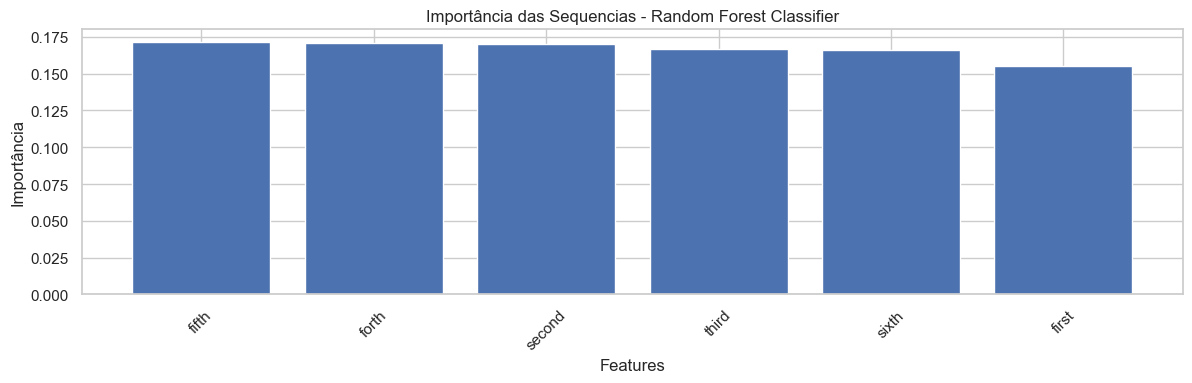

In [36]:
importancia = random_forest.feature_importances_
indices = sorted(range(len(importancia)), key=lambda i: importancia[i], reverse=True)
colunas = list(df.columns[2:-1])

plt.figure(figsize=(12, 4))
plt.title("Importância das Sequencias - Random Forest Classifier")
plt.bar(range(len(importancia)), [importancia[i] for i in indices], align='center')
plt.xticks(range(len(importancia)), [colunas[i] for i in indices], rotation=45)
plt.xlabel('Features')
plt.ylabel('Importância')
plt.tight_layout()
plt.show()

In [37]:
quinto = df[df['status'] == 1]['fifth'].mode()
quarto = df[df['status'] == 1]['forth'].mode()
segundo = df[df['status'] == 1]['second'].mode()
terceiro = df[df['status'] == 1]['third'].mode()
sexto = df[df['status'] == 1]['sixth'].mode()
primeiro = df[df['status'] == 1]['first'].mode()

print(quinto)
print(quarto)
print(segundo)
print(terceiro)
print(sexto)
print(primeiro)

0    42
Name: fifth, dtype: int64
0    33
Name: forth, dtype: int64
0    10
Name: second, dtype: int64
0    28
Name: third, dtype: int64
0    58
Name: sixth, dtype: int64
0    1
Name: first, dtype: int64


##### Possíveis resultados com Desicion Tree Classifier 

In [43]:
import graphviz as gv
from sklearn.tree import export_graphviz

In [44]:
gr = export_graphviz(decision_tree, out_file=None, filled=True, rounded= True, special_characters= True)
graphic = gv.Source(gr)